#Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Reading Dataset

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/agrwlnitika/Data-Analysis/master/Breast%20Cancer%20Detection/Breast_cancer.csv' )

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
print("Cancer data set dimensions : {}".format(df.shape))

Cancer data set dimensions : (569, 32)


#Data Preprocessing

In [0]:
X = df.iloc[:, 2:32].values
Y = df.iloc[:, 1].values

##Removing null values

In [7]:
df.isnull().sum()
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Categorical Data to Numeric Form Conversion

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
print(Y) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [9]:
df1 = pd.DataFrame(X, index=df.index, columns=df.columns[2:32])
df1['diagnosis'] = Y
display(df1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


#Data Visualization

##Heatmap

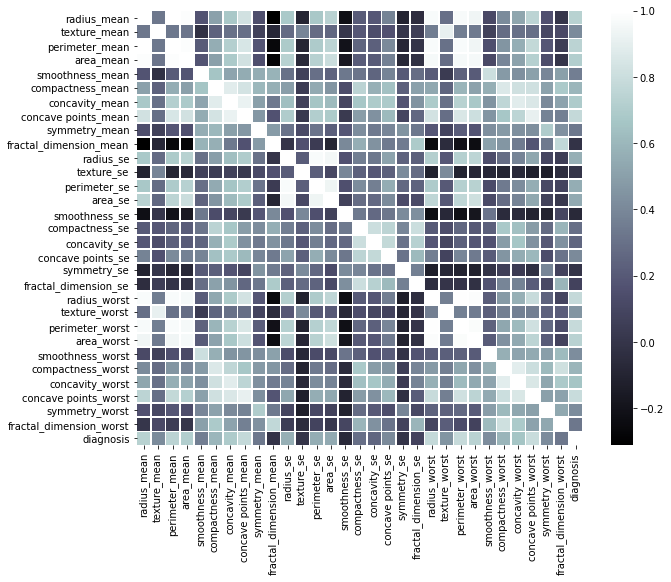

In [10]:
corr = df1.corr()

# plot the heatmap
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.75,cmap= 'bone')

##Target Count

Text(0.5, 1.0, 'Count of each Target Class')

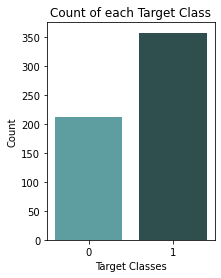

In [11]:
plt.rcParams['figure.figsize'] = 3,4
plt.bar(df1['diagnosis'].unique(), df1['diagnosis'].value_counts(), color = ['darkslategrey', 'cadetblue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

##Histogram

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


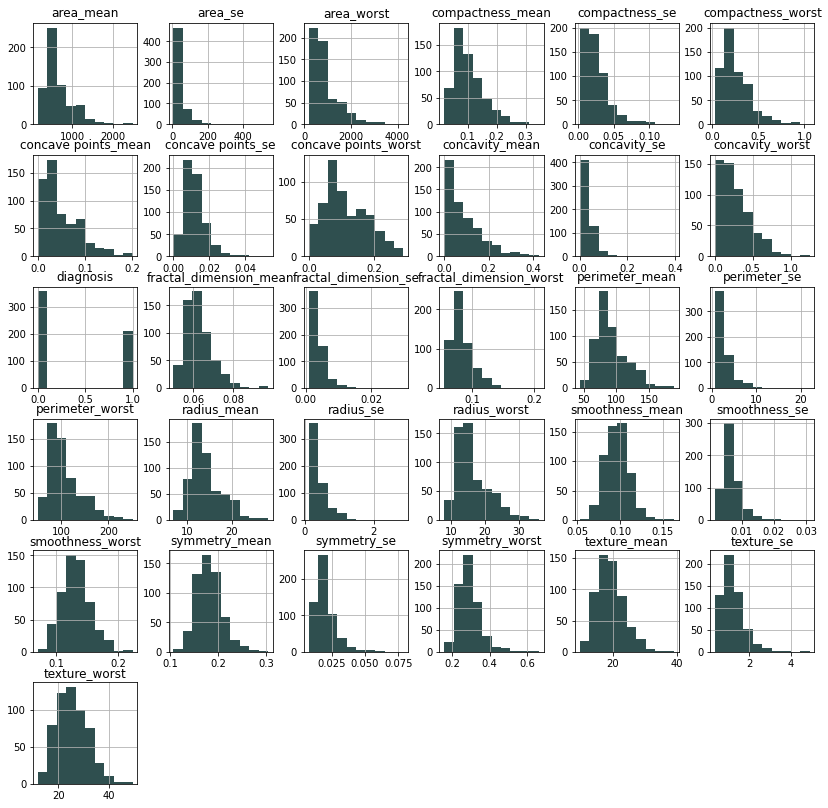

In [12]:
fig = plt.figure(figsize = (14,14))
ax = fig.gca()

df1.hist(ax=ax,color='darkslategrey')
plt.show()

#Testing and Training


Splitting the data based on Training-Testing Ratio - 75:25 

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test1 = train_test_split(X, Y, test_size = 0.25, random_state = 0)
X_train, X_test, Y_train, y_test2 = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Scaling the data

In [0]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Algorithms

GLOSSARY

fn - false negative values

---


tn - true negative values

---


fp - false positive values

---


fn - false negative values

---


fnr - false negative rate

---


tpr - true positive rate / sensitivity

---


fpr - false positive rate 

---


tnr - true negative rate 

---
acc - accuracy

---


pc - precision

---


rc - recall

---


f1_score - f1 measure

---

roc - receiver operation characteristic

---


mcc - matthew correlation coefficient

---


npv - negative predictive value

---


fdr - false discovery rate

---
specificity - specificity


##Support Vector Machine

Training the data using SVM classification algorithm

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
predictions1 = classifier.predict(X_test)

###Results

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score , f1_score ,matthews_corrcoef , precision_score ,roc_curve, auc

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



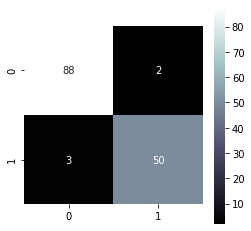

In [18]:
tn1, fp1, fn1, tp1= confusion_matrix(y_test1, predictions1).ravel() #Extracting values of tn , fp , fn and tp from the confusion matrix
cf_matrix=confusion_matrix(y_test1,predictions1)
fig = plt.figure(figsize=(4,4))
sns.heatmap(cf_matrix, annot=True,square=True, cmap= 'bone')
print(classification_report(y_test1,predictions1)) 
tpr1=(tp1)/(tp1+fn1) #sensitivity / true positive rate
fpr1=(fp1)/(fp1+tn1) #false positive rate
fnr1=(fn1)/(tp1+fn1) #false negative rate
npv1= tn1/(tn1+fn1) #Negative predictive value
fdr1=fp1/(fp1+tp1) #false discovery rate
mcc1= matthews_corrcoef(y_test1,predictions1) #Matthews Corelation Coefficient
pc1=precision_score(y_test1, predictions1) #precision 
specificity1= (tn1)/(tn1+fp1) #specificity
f1, t1,_ = roc_curve(y_test1,predictions1) #Extracting values of fpr and tpr from confusion matrix
rc1=auc(f1,t1) #roc
f1_score1=f1_score(y_test1, predictions1) #f1 measure
acc1=accuracy_score(y_test1, predictions1) #accuracy

ROC Curve

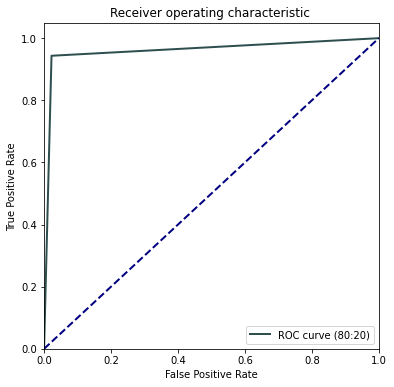

In [19]:
plt.figure(figsize=(6,6))
lw = 2
plt.plot(f1, t1, color='darkslategrey',
         lw=lw, label='ROC curve (80:20)' % rc1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

Results in Tabular Form

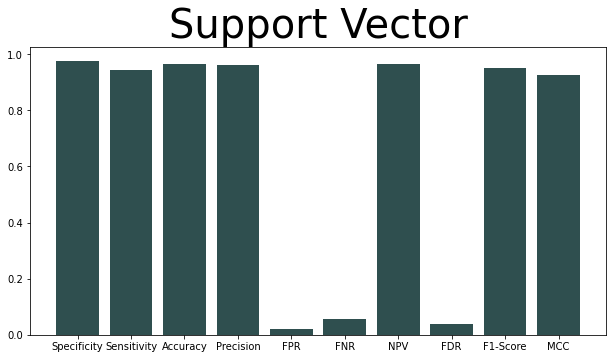

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
measures = ['Specificity', 'Sensitivity','Accuracy','Precision','FPR','FNR','NPV','FDR','F1-Score','MCC']
value = [specificity1,tpr1,acc1,pc1, fpr1 , fnr1,npv1 , fdr1, f1_score1, mcc1]
ax.bar(measures,value ,color = ['darkslategrey'])
ax.set_title('Support Vector',size = 40)
plt.show()


Results in Tabular Form

In [21]:
data = [["Specificity",specificity1], ["Sensitivity",tpr1], ["Accuracy",acc1], ["Precision",pc1], ["FPR",fpr1], ["FNR",fnr1], ["NPV",npv1], ["FDR",fdr1], ["F1-Score",f1_score1], ["MCC",mcc1]]

pd.DataFrame(data, columns=["Algorithm and Measures ", "75:25 "])

,Algorithm and Measures,75:25
0,Specificity,0.977778
1,Sensitivity,0.943396
2,Accuracy,0.965035
3,Precision,0.961538
4,FPR,0.022222
5,FNR,0.056604
6,NPV,0.967033
7,FDR,0.038462
8,F1-Score,0.952381
9,MCC,0.924865


##Naive Bayes Theorem

Training the data using Naive Bayes algorithm

In [22]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
predictions2 = classifier.predict(X_test)

###Results

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        90
           1       0.89      0.89      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



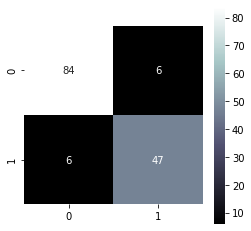

In [24]:
tn2, fp2, fn2, tp2= confusion_matrix(y_test2, predictions2).ravel() #Extracting values of tn , fp , fn and tp from the confusion matrix
cf_matrix2=confusion_matrix(y_test2,predictions2) 
fig = plt.figure(figsize=(4,4))
sns.heatmap(cf_matrix2, annot=True,square=True, cmap= 'bone')
print(classification_report(y_test2,predictions2)) 
tpr2=(tp2)/(tp2+fn2) #sensitivity / true positive rate
fpr2=(fp2)/(fp2+tn2) #false positive rate
fnr2=(fn2)/(tp2+fn2) #false negative rate
npv2= tn2/(tn2+fn2) #Negative predictive value
fdr2=fp2/(fp2+tp2) #false discovery rate
mcc2= matthews_corrcoef(y_test2,predictions2) #Matthews Corelation Coefficient
specificity2= (tn2)/(tn2+fp2) #specificity
pc2=precision_score(y_test2, predictions2) #precision 
f2, t2,_ = roc_curve(y_test2,predictions2) #Extracting values of fpr and tpr from confusion matrix
rc2=auc(f2,t2) #roc
f1_score2=f1_score(y_test2,predictions2) #f1 measure
acc2=accuracy_score(y_test2, predictions2) #accuracy

ROC Curve

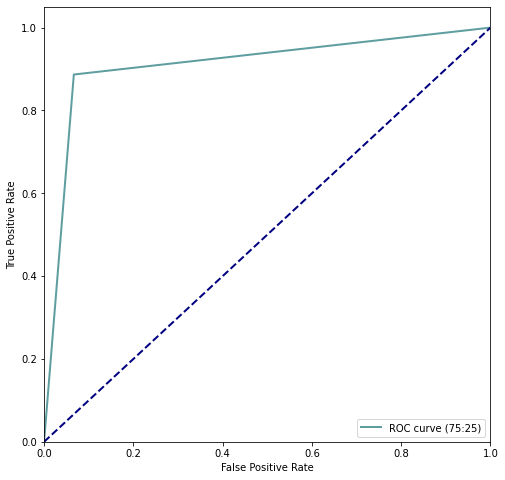

In [25]:
plt.figure(figsize=(8,8))
lw = 2
plt.plot(f2, t2, color='cadetblue',
         lw=lw, label='ROC curve (75:25)' % rc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Results in Tabular Form

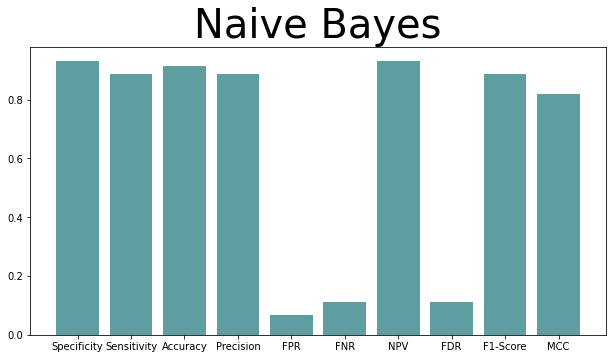

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
measures = ['Specificity', 'Sensitivity','Accuracy','Precision','FPR','FNR','NPV','FDR','F1-Score','MCC']
value = [specificity2,tpr2,acc2,pc2, fpr2 , fnr2,npv2 , fdr2, f1_score2, mcc2]
ax.bar(measures,value ,color = ['cadetblue'])
ax.set_title('Naive Bayes',size = 40)
plt.show()

Results in Tabular Form

In [27]:
data = [["Specificity",specificity2], ["Sensitivity",tpr2], ["Accuracy",acc2], ["Precision",pc2], ["FPR",fpr2], ["FNR",fnr2], ["NPV",npv2], ["FDR",fdr2], ["F1-Score",f1_score2], ["MCC",mcc2]]

pd.DataFrame(data, columns=["Algorithm and Measures ", "75:25 "])

,Algorithm and Measures,75:25
0,Specificity,0.933333
1,Sensitivity,0.886792
2,Accuracy,0.916084
3,Precision,0.886792
4,FPR,0.066667
5,FNR,0.113208
6,NPV,0.933333
7,FDR,0.113208
8,F1-Score,0.886792
9,MCC,0.820126


##Comparison of SVM and Naive Bayes

In [28]:
import pandas as pd
data = [["Specificity",specificity1,specificity2], ["Sensitivity",tpr1, tpr2], ["Accuracy",acc1, acc2], ["Precision",pc1, pc2], ["FPR",fpr1, fpr2], ["FNR",fnr1,fnr2 ], ["NPV",npv1, npv2], ["FDR",fdr1, fdr2], ["F1-Score",f1_score1, f1_score2], ["MCC",mcc1, mcc2]]
print("RATIO 75:25")
pd.DataFrame(data, columns=["Algorithm and Measures ", "SVM ","Naive Bayes"])

RATIO 75:25


,Algorithm and Measures,SVM,Naive Bayes
0,Specificity,0.977778,0.933333
1,Sensitivity,0.943396,0.886792
2,Accuracy,0.965035,0.916084
3,Precision,0.961538,0.886792
4,FPR,0.022222,0.066667
5,FNR,0.056604,0.113208
6,NPV,0.967033,0.933333
7,FDR,0.038462,0.113208
8,F1-Score,0.952381,0.886792
9,MCC,0.924865,0.820126


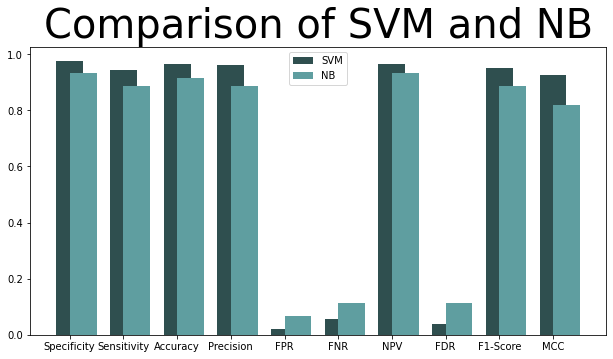

In [29]:

data = [ [specificity1,tpr1,acc1,pc1, fpr1 , fnr1,npv1 , fdr1, f1_score1, mcc1],
 [specificity2,tpr2,acc2,pc2, fpr2 , fnr2,npv2 , fdr2, f1_score2, mcc2]]

measures = ['Specificity', 'Sensitivity','Accuracy','Precision','FPR','FNR','NPV','FDR','F1-Score','MCC']
bars = np.arange(10)
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(bars + 0.00, data[0], color = 'darkslategrey', width = 0.5)
ax.bar(bars + 0.25, data[1], color = 'cadetblue', width = 0.5)
ax.legend(labels=['SVM', 'NB'])
ax.set_title('Comparison of SVM and NB',size = 40)
plt.xticks(bars, measures)
plt.show()
